### Theory
Canny Edge Detection is a popular edge detection algorithm. It was developed by John F. Canny in 1986. It is a multi-stage algorithm and we will go through each stages.

#### <code>1. Noise Reduction</code>

Since edge detection is susceptible to noise in the image, first step is to remove the noise in the image with a 5x5 Gaussian filter. We have already seen this in previous chapters.

#### <code>2. Finding Intensity Gradient of the Image<code>

* Smoothened image is then filtered with a Sobel kernel in both horizontal and vertical direction to get first derivative in horizontal direction ( Gx) and vertical direction ( Gy). From these two images, we can find edge gradient and direction for each pixel as follows:

$Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} \\ Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg)$

* Gradient direction is always perpendicular to edges. It is rounded to one of four angles representing vertical, horizontal and two diagonal directions.

#### <code>3. Non-maximum Suppression</code>

* After getting gradient magnitude and direction, a full scan of image is done to remove any unwanted pixels which may not constitute the edge. For this, at every pixel, pixel is checked if it is a local maximum in its neighborhood in the direction of gradient. Check the image below:


<img src="https://docs.opencv.org/master/nms.jpg" alt="drawing" width="350"/>

* Point A is on the edge ( in vertical direction). Gradient direction is normal to the edge. Point B and C are in gradient directions. So point A is checked with point B and C to see if it forms a local maximum. If so, it is considered for next stage, otherwise, it is suppressed ( put to zero).

In short, the result you get is a binary image with "thin edges".

#### <code>4. Hysteresis Thresholding</code>

* This stage decides which are all edges are really edges and which are not. For this, we need two threshold values, minVal and maxVal. Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are also discarded. See the image below:

<img src="https://docs.opencv.org/master/hysteresis.jpg" alt="drawing" width="350"/>

* The edge A is above the maxVal, so considered as "sure-edge". Although edge C is below maxVal, it is connected to edge A, so that also considered as valid edge and we get that full curve. But edge B, although it is above minVal and is in same region as that of edge C, it is not connected to any "sure-edge", so that is discarded. So it is very important that we have to select minVal and maxVal accordingly to get the correct result.

This stage also removes small pixels noises on the assumption that edges are long lines.

So what we finally get is strong edges in the image.

Canny Edge Detection in OpenCV
#### We use the function: cv.Canny(image, edges, threshold1, threshold2, apertureSize = 3, L2gradient = false)

Parameters
image--> 8-bit input image.

edges--> output edge map; single channels 8-bit image, which has the same size as image.

threshold1--> first threshold for the hysteresis procedure.

threshold2--> second threshold for the hysteresis procedure.

apertureSize--> aperture size for the Sobel operator.

L2gradient--> specifies the equation for finding gradient magnitude. If it is True, it uses the equation mentioned above which is more accurate, otherwise it uses this function: Edge_Gradient(G)=|Gx|+|Gy|.

In [15]:
# import utils 
from utils
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = utils.PATH

img = cv2.imread(path + "lena.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny = cv2.Canny(img, 100, 200)

titles = ['image', 'canny']
images = [img, canny]
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

SyntaxError: invalid syntax (359288014.py, line 2)

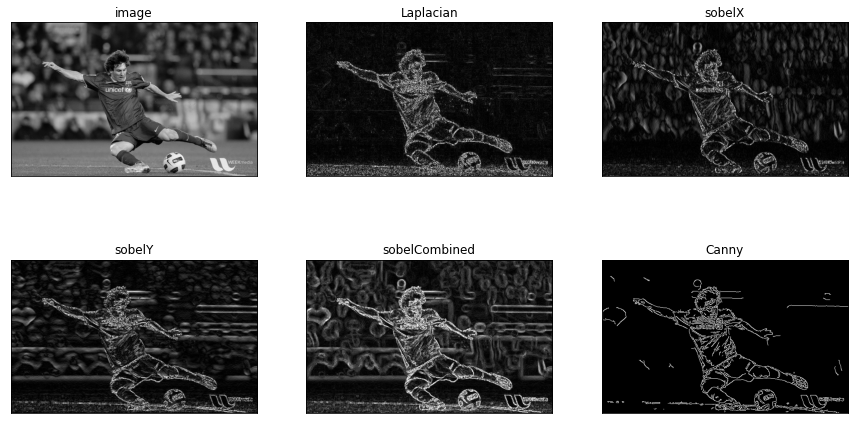

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(path + "messi5.jpg", cv2.IMREAD_GRAYSCALE)
lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))
sobelX = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img, cv2.CV_64F, 0, 1)
edges = cv2.Canny(img,100,200)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

titles = ['image', 'Laplacian', 'sobelX', 'sobelY', 'sobelCombined', 'Canny']
images = [img, lap, sobelX, sobelY, sobelCombined, edges]
plt.figure(figsize = (15,8))
for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()